Converged after 15 steps for E = -2.00
Converged after 13 steps for E = -1.98
Converged after 13 steps for E = -1.96
Converged after 13 steps for E = -1.94
Converged after 14 steps for E = -1.92
Converged after 13 steps for E = -1.90
Converged after 13 steps for E = -1.88
Converged after 14 steps for E = -1.86
Converged after 19 steps for E = -1.84
Converged after 14 steps for E = -1.82
Converged after 18 steps for E = -1.80
Converged after 13 steps for E = -1.78
Converged after 14 steps for E = -1.76
Converged after 16 steps for E = -1.74
Converged after 15 steps for E = -1.72
Converged after 14 steps for E = -1.70
Converged after 16 steps for E = -1.68
Converged after 15 steps for E = -1.66
Converged after 15 steps for E = -1.64
Converged after 16 steps for E = -1.62
Converged after 14 steps for E = -1.60
Converged after 14 steps for E = -1.58
Converged after 15 steps for E = -1.56
Converged after 24 steps for E = -1.54
Converged after 18 steps for E = -1.52
Converged after 20 steps 

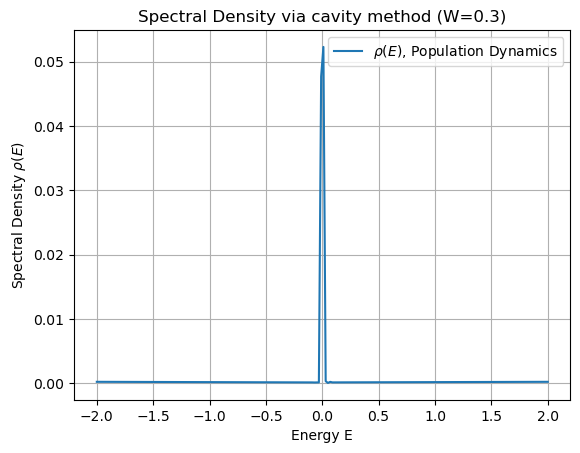

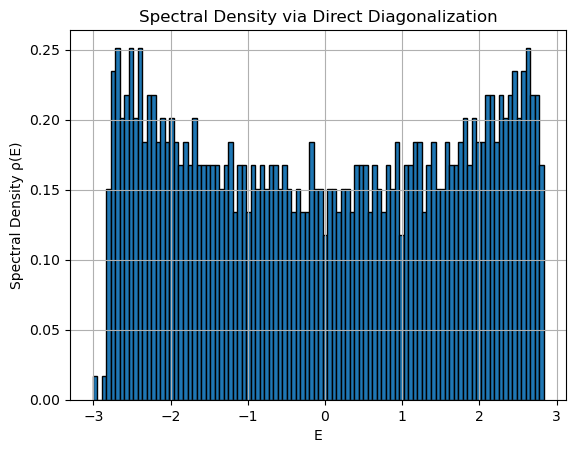

In [1]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
import networkx as nx

###ex.3.2

# Parameters
N = 2**10
c = 3
W = 0.3

##set up RRGs
G_resolvent = nx.random_regular_graph(c, N)
A_adjacent = nx.to_scipy_sparse_array(G_resolvent, format="csr")
E_matrix = np.random.uniform(-W/2, W/2,N)
H_matrix = -A_adjacent + sp.diags(E_matrix)

# direct diagonalization
eigvals = spla.eigsh(H_matrix, N-2, return_eigenvectors=False)

def population_dynamics(E, W=0.3, c=3, Np=1000, epsilon=1e-3, max_iter=1000, bound=1e-6):
    omega = np.random.uniform(-1, 1, Np) + 1j * np.random.uniform(0.01, 0.1, Np)
    
    for t in range(max_iter):
        i = np.random.randint(0, Np, size=(Np, c - 1))
        omega_neighbours = omega[i]
        sum_neighbours = np.sum(1.0 / omega_neighbours, axis=1)
        E_i = np.random.uniform(-W / 2, W / 2, Np)
        omega_new = E + E_i + 1j * epsilon + sum_neighbours

        # Convergence check
        delta = np.abs(np.mean(omega_new.imag) - np.mean(omega.imag))
        if delta < bound:
            print(f'Converged after {t} steps for E = {E:.2f}')
            break

        omega = omega_new

    return omega_new

energies = np.linspace(-2, 2, 200)
rho_E = []

for E in energies:
    omega = population_dynamics(E, W=0.3)
    rho_E.append(np.mean(omega.imag) / np.pi)

# Plot
plt.plot(energies, rho_E, label=r'$\rho(E)$, Population Dynamics')
plt.xlabel('Energy E')
plt.ylabel(r'Spectral Density $\rho(E)$')
plt.title('Spectral Density via cavity method (W=0.3)')
plt.grid(True)
plt.legend()
plt.show()

plt.hist(eigvals, bins=100,edgecolor='black',density=True)
plt.xlabel('E')
plt.ylabel('Spectral Density ρ(E)')
plt.title('Spectral Density via Direct Diagonalization')
plt.grid(True)
plt.show()

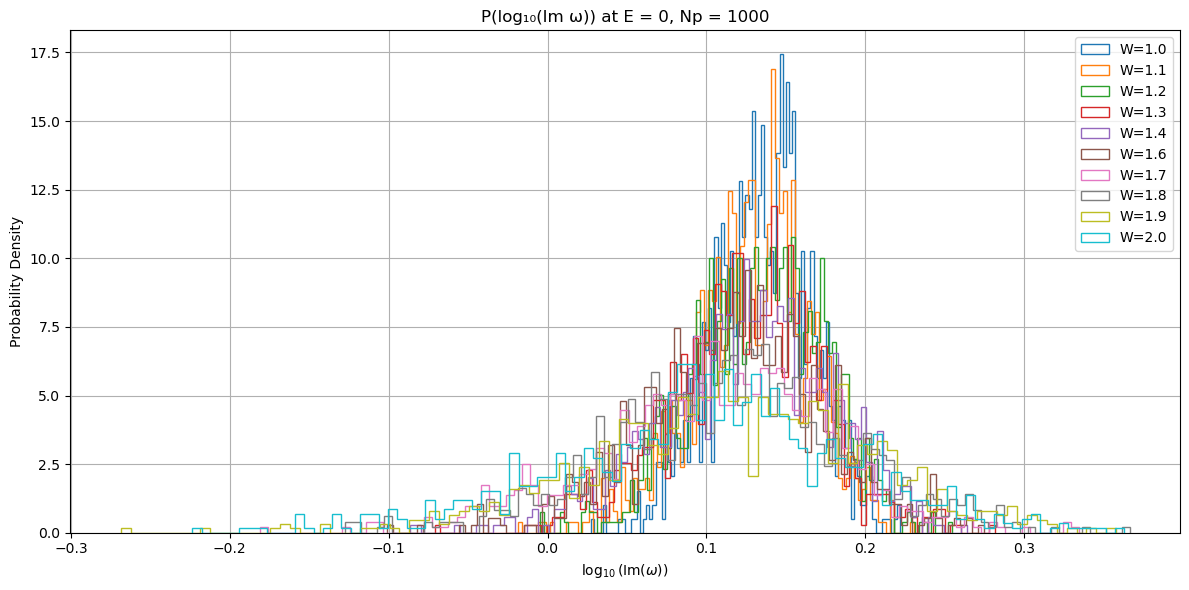

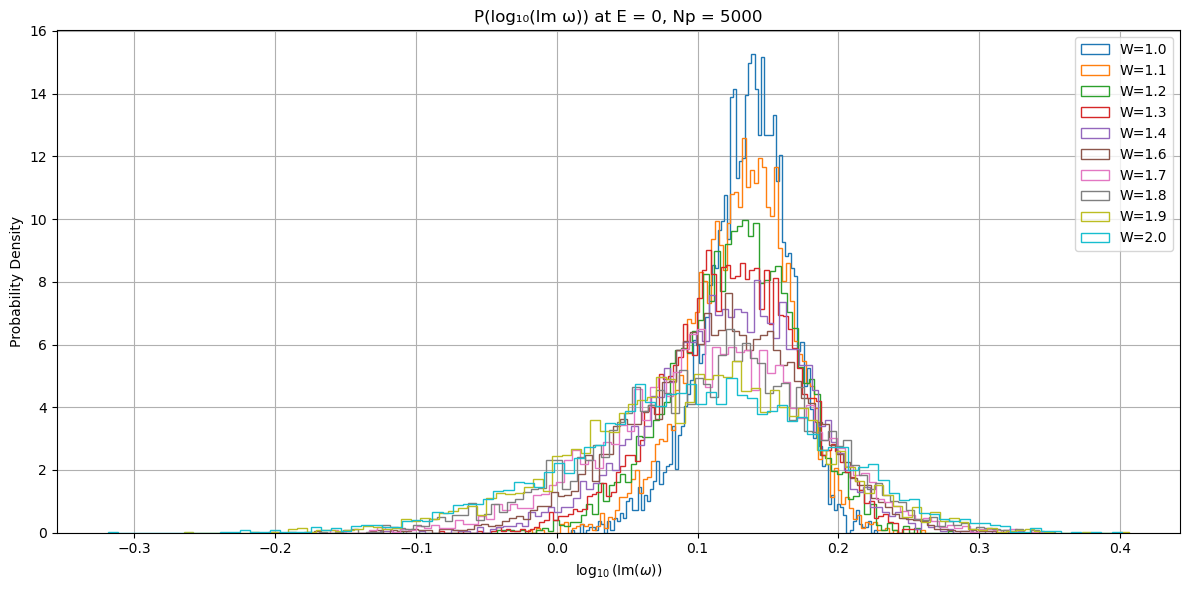

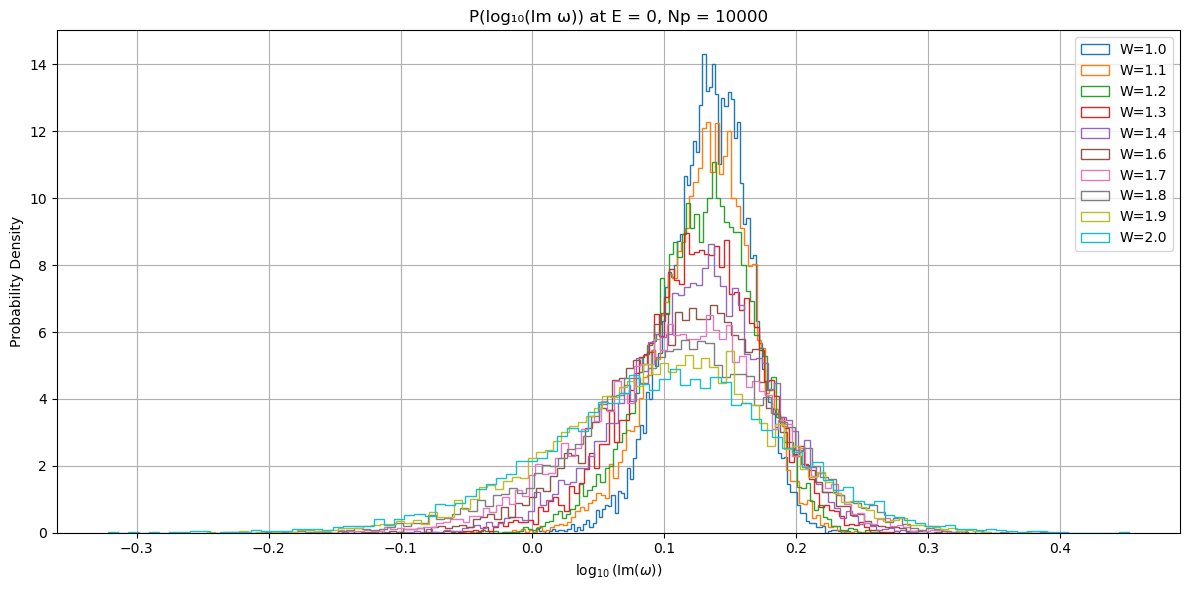

In [3]:
import numpy as np
import matplotlib.pyplot as plt

###ex.2.4

def popdyn_get_log_imag(W, Np=10000, c=3, E=0.0, epsilon=1e-300, max_iter=1000, bound=1e-5):
    omega = np.random.uniform(-1, 1, Np) + 1j * np.random.uniform(0.01, 0.1, Np)

    for t in range(max_iter):
        i = np.random.randint(0, Np, size=(Np, c - 1))
        omega_neighbours = omega[i]
        sum_neighbours = np.sum(1.0 / omega_neighbours, axis=1)
        E_i = np.random.uniform(-W/2, W/2, Np)
        omega_new = E + E_i + 1j * epsilon + sum_neighbours

        if np.mean(np.abs(omega_new - omega)) < bound:
            break

        omega = omega_new

    log_im = np.log10(omega.imag + 1e-20)  # avoid log(0)
    return log_im

# Sweep disorder strengths
Ws = np.linspace(1.0, 2.0, 10)
Np_list = [10**3, 5*10**3, 10**4]

# Plot histograms for each W
for Np in Np_list:
    plt.figure(figsize=(12, 6))
    for W in Ws:
        log_im = popdyn_get_log_imag(W, Np=Np)
        plt.hist(log_im, bins=100, density=True, histtype='step', label=f'W={W:.1f}')
    plt.title(f'P(log₁₀(Im ω)) at E = 0, Np = {Np}')
    plt.xlabel(r'$\log_{10}(\text{Im}(\omega))$')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

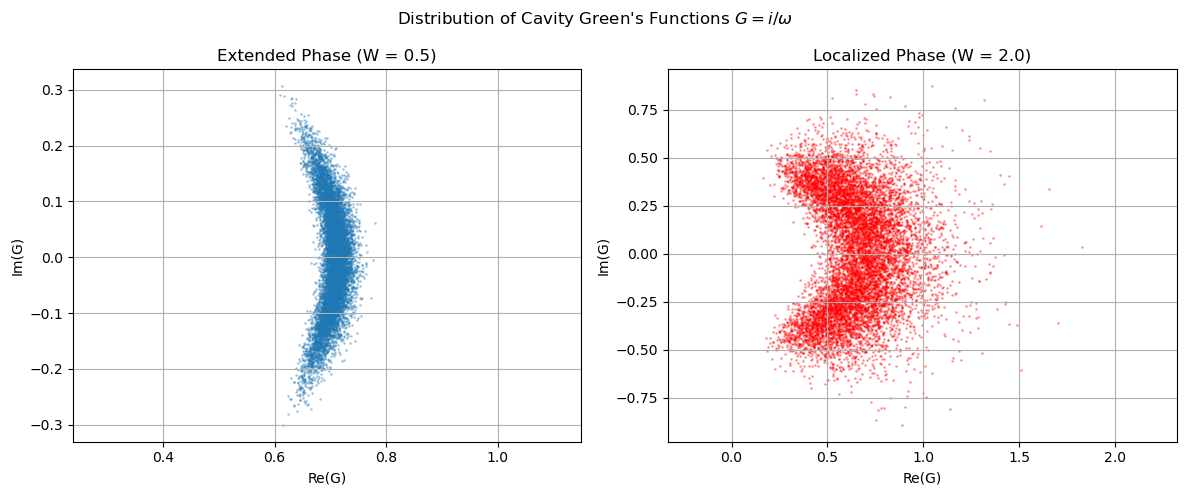

In [4]:
##ex.3.5

def G_distribution(W, Np=10000, c=3, E=0.0, epsilon=1e-6, max_iter=1000):
    omega = np.random.uniform(-1, 1, Np) + 1j * np.random.uniform(0.01, 0.1, Np)

    for t in range(max_iter):
        i = np.random.randint(0, Np, size=(Np, c - 1))
        omega_neighbors = omega[i]
        sum_neighbours = np.sum(1.0 / omega_neighbors, axis=1)
        E_i = np.random.uniform(-W / 2, W / 2, Np)
        omega = E + E_i + 1j * epsilon + sum_neighbours

    G = 1j / omega  # cavity Green's function
    return G

#distribution for both extenden and local domains
G_ext = G_distribution(W=0.5)
G_loc = G_distribution(W=2.0)

# Plot real vs imag for both
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(G_ext.real, G_ext.imag, s=1, alpha=0.3, label='W=0.5')
plt.xlabel('Re(G)')
plt.ylabel('Im(G)')
plt.title('Extended Phase (W = 0.5)')
plt.grid(True)
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(G_loc.real, G_loc.imag, s=1, alpha=0.3, color='r', label='W=2.0')
plt.xlabel('Re(G)')
plt.ylabel('Im(G)')
plt.title('Localized Phase (W = 2.0)')
plt.grid(True)
plt.axis('equal')

plt.suptitle('Distribution of Cavity Green\'s Functions $G = i/\omega$')
plt.tight_layout()
plt.show()

N=1024, W=5.0, N*I2=5.357
N=1024, W=6.0, N*I2=7.875
N=1024, W=7.0, N*I2=12.262
N=1024, W=8.0, N*I2=28.781
N=1024, W=9.0, N*I2=39.076
N=1024, W=10.0, N*I2=70.289
N=2048, W=5.0, N*I2=5.423
N=2048, W=6.0, N*I2=7.891
N=2048, W=7.0, N*I2=14.518
N=2048, W=8.0, N*I2=23.424
N=2048, W=9.0, N*I2=53.678
N=2048, W=10.0, N*I2=96.448
N=4096, W=5.0, N*I2=5.381
N=4096, W=6.0, N*I2=7.727
N=4096, W=7.0, N*I2=15.589
N=4096, W=8.0, N*I2=35.709
N=4096, W=9.0, N*I2=60.425
N=4096, W=10.0, N*I2=126.316


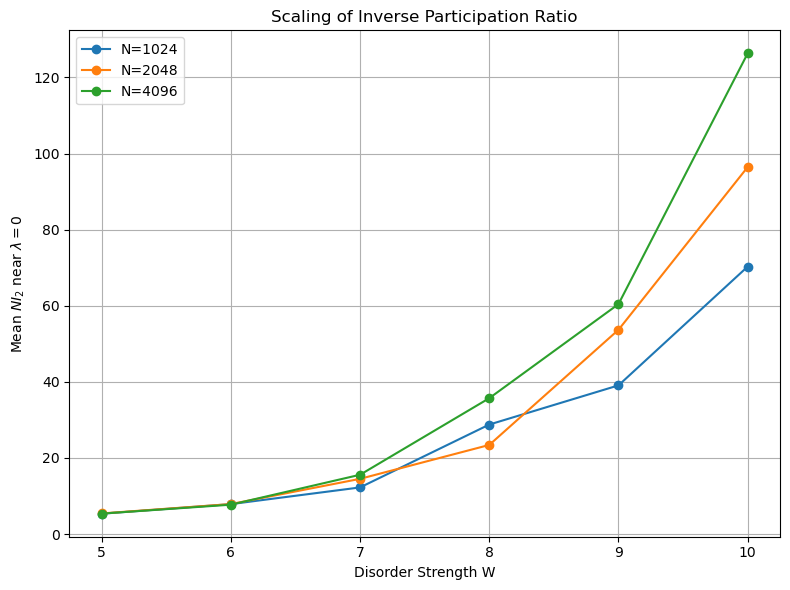

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import random as sparse_random
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import eigsh
from networkx.generators.random_graphs import random_regular_graph
import networkx as nx

###ex.3.6

def generate_H(N, c, W):
    A_adjacent = nx.to_numpy_array(nx.random_regular_graph(c, N))
    eps = np.random.uniform(-W/2, W/2, N)
    H = -A_adjacent + np.diag(eps)
    return H

##IPR for studying localization
def compute_IPR(evecs):
    return np.sum(evecs**4, axis=0) / np.sum(evecs**2, axis=0)**2

##IPR for large N
def mean_NIPR(N, c, W, num_evecs=10, num_avg=10):
    NIPRs = []
    for _ in range(num_avg):
        H = generate_H(N, c, W)
        vals, vecs = eigsh(H, k=num_evecs, sigma=0.0, which='LM')  # near λ=0
        I2 = compute_IPR(vecs)
        NIPRs.extend(N * I2)
    return np.mean(NIPRs)


sizes = [2**10, 2**11, 2**12]
Ws = np.arange(5.0, 10.1, 1)
c = 3

results = {N: [] for N in sizes}
for N in sizes:
    for W in Ws:
        nipr = mean_NIPR(N, c, W, num_avg=10)
        results[N].append(nipr)
        print(f"N={N}, W={W:.1f}, N*I2={nipr:.3f}")


plt.figure(figsize=(8, 6))
for N in sizes:
    plt.plot(Ws, results[N], '-o', label=f'N={N}')
plt.xlabel('Disorder Strength W')
plt.ylabel(r'Mean $N I_2$ near $\lambda = 0$')
plt.title('Scaling of Inverse Participation Ratio')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()